### CONTEXT: 

#### A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all relevant customer data and develop focused customer retention programs.

### PROJECT OBJECTIVE: 

#### Build a model that will help to identify the potential customers who have a higher probability to churn. 

This help the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategising customer retention

In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Import and warehouse data: 
[ Score: 5 point ]

• Import all the given datasets. Explore shape and size.

• Merge all datasets onto one and explore final shape and size.

In [2]:
# Importing files

data1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
data2 = pd.read_csv('TelcomCustomer-Churn_2.csv')

# See the shape and size of the files

data1.shape, data2.shape

((7043, 10), (7043, 11))

In [3]:
data1.size, data2.size

(70430, 77473)

In [4]:
# Checking data columns to figure out the data.

data1.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes


In [5]:
data2.head(3)

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [6]:
# Merging both data sets column wise.

data = pd.concat([data1, data2], axis = 1)
data.shape

# Now we have total 21 columns with same number of rows.

(7043, 21)

In [7]:
data.size

147903

In [8]:
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


### 2. Data cleansing: 
[ Score: 10 point ]

• Missing value treatment

• Convert categorical attributes to continuous using relevant functional knowledge

• Drop attribute/s if required using relevant functional knowledge

• Automate all the above steps

In [9]:
# Checking for columns, data types and Non-null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We will need to change data types as most of the columns are categorical and few of the other as well have incorrect data types.

SeniorCitizen is in int64 which should be categorical.

TotalCharges is object which should be float64. It might have some null values so its data type is object. We will check it.

In [10]:
# Checking for null values

data.isnull().sum().sum()

# No missing values

0

In [11]:
# Checking column values

data.head(7).T

,0,1,2,3,4,5,6
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK
gender,Female,Male,Male,Male,Female,Female,Male
SeniorCitizen,0,0,0,0,0,0,0
Partner,Yes,No,No,No,No,No,No
Dependents,No,No,No,No,No,No,Yes
tenure,1,34,2,45,2,8,22
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No


We will not need customerID for analysis.


In [12]:
# We do not need Customer ID, so lets drop that column

data.drop('customerID', axis = 1, inplace = True)
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [13]:
# Let us check column values to see if any descripancy

columns = data.columns
for i in columns:
    print(i, (data[i].unique()), data[i].dtype)

gender ['Female' 'Male'] object
SeniorCitizen [0 1] int64
Partner ['Yes' 'No'] object
Dependents ['No' 'Yes'] object
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] int64
PhoneService ['No' 'Yes'] object
MultipleLines ['No phone service' 'No' 'Yes'] object
InternetService ['DSL' 'Fiber optic' 'No'] object
OnlineSecurity ['No' 'Yes' 'No internet service'] object
OnlineBackup ['Yes' 'No' 'No internet service'] object
DeviceProtection ['No' 'Yes' 'No internet service'] object
TechSupport ['No' 'Yes' 'No internet service'] object
StreamingTV ['No' 'Yes' 'No internet service'] object
StreamingMovies ['No' 'Yes' 'No internet service'] object
Contract ['Month-to-month' 'One year' 'Two year'] object
PaperlessBilling ['Yes' 'No'] object
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 '

We need to know what all unique values are present for each categorical variable to see if they are ordered or unordered. We will use replace from few columns and LableEncoder for few to change it to categorical.

In [14]:
# We will need to convert all objects into categorical except TotalCharges which needs to convert to float64.

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')

In [15]:
# Let us check for missing values

data.isnull().sum().sum()

11

In [16]:
# We have 11 missing values, we will drop these as its small number compared to total data.

data.dropna(axis = 0, inplace = True)
data.shape

(7032, 20)

In [17]:
# Convert objects into codes as they are categorical variables
# Giving codes manually to categories which also has other than yes and no.

replaceCat = {'MultipleLines': {'No phone service': -1, 'No': 0, 'Yes': 1},
          'OnlineSecurity': {'No internet service': -1, 'No': 0, 'Yes': 1},
          'OnlineBackup': {'No internet service': -1, 'No': 0, 'Yes': 1},
          'DeviceProtection': {'No internet service': -1, 'No': 0, 'Yes': 1},
          'TechSupport': {'No internet service': -1, 'No': 0, 'Yes': 1},
          'StreamingTV': {'No internet service': -1, 'No': 0, 'Yes': 1},
          'StreamingMovies': {'No internet service': -1, 'No': 0, 'Yes': 1},
             'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': -1},
             'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
             'PaymentMethod': {'Electronic check': 0, 'Mailed check': 1, 
                               'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}}

data = data.replace(replaceCat)

In [18]:
LabelEncod = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

from sklearn.preprocessing import LabelEncoder 
labelencoder = LabelEncoder()
for i in LabelEncod:
    data[i] = labelencoder.fit_transform(data[i])

In [19]:
data.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [20]:
# Convert datatypes to category
for col_name in data.columns:
    if(data[col_name].dtype == 'int64'):
        data[col_name] = data[col_name].astype('category').cat.as_ordered()
    if(data[col_name].dtype == 'object'):
        data[col_name] = data[col_name].astype('category').cat.as_ordered()
        
data['tenure'] = data['tenure'].astype('int64')

In [21]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,-1,0,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,-1,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   category
 2   Partner           7032 non-null   category
 3   Dependents        7032 non-null   category
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   category
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   category
 16  PaymentMethod     7032 n

We have total 19 columns with 7032 rows. Most of the variables are categorical and 3 in numeric.

### 3. Data analysis & visualisation: 
[ Score: 10 point ]

• Perform detailed statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. 

In [23]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7032.0,2.0,1.0,3549.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7032.0,2.0,0.0,5890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,7032.0,2.0,0.0,3639.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7032.0,2.0,0.0,4933.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7032.0,NaN,NaN,NaN,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
PhoneService,7032.0,2.0,1.0,6352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7032.0,3.0,0.0,3385.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7032.0,3.0,1.0,3096.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7032.0,3.0,0.0,3497.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7032.0,3.0,0.0,3087.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Numeric variables:**

It seems tenure and MonthlyCharges are normally distributed. 

But TotalCharges has some outliers, 75% is 3794 and max is 8684.

**Catgorical variables:**

SeniorCitizen, Dependents, No PhoneService data is less compared to Non-SeniorCitizen, Non-Dependents, with PhoneService.

Not able to analyse categorical variables with unique value more than 2. We will check that below.

Non-Churned data is more than Churned data. Approx. 5000 data is for non-Churned and 2000 data is for Churned.

### Univariate Analysis

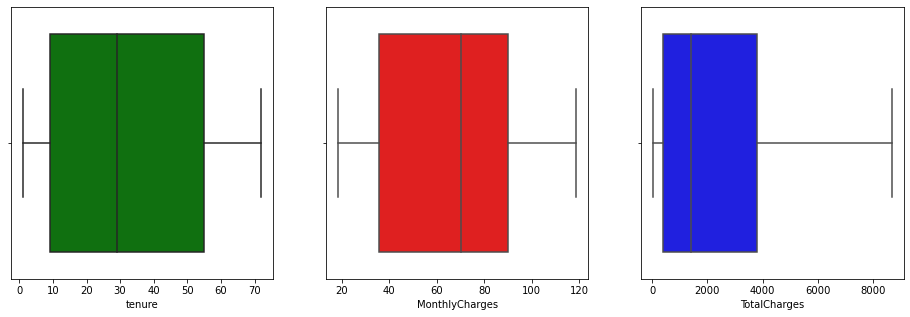

In [24]:
# Let us draw box plot for continuous variable

plt.figure(figsize = (16,5))
plt.subplot(1, 3, 1)
sns.boxplot(data = data, x = 'tenure', color = 'green');

plt.subplot(1, 3, 2)
sns.boxplot(data = data, x = 'MonthlyCharges', color = 'red');

plt.subplot(1, 3, 3)
sns.boxplot(data = data, x = 'TotalCharges', color = 'blue');

From above box plot we can say that there are no outliers present but the data for TotalCharges is right tailed. 

For TotalCharges 75% of the data is below 4000. We also saw this in statistical analysis. Let us check distributions by histogram to get more clarity.

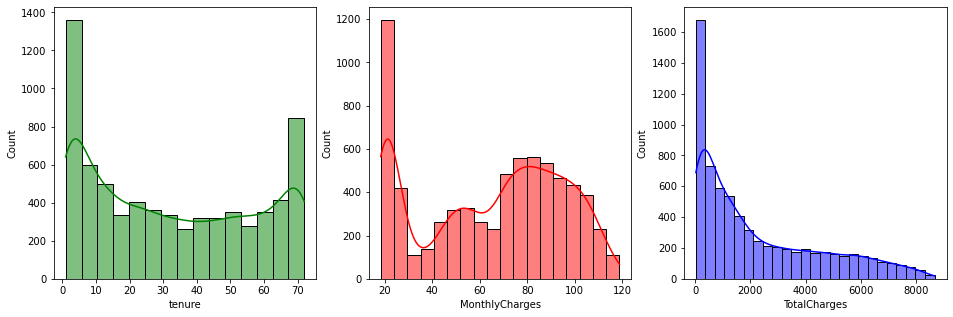

In [25]:
plt.figure(figsize = (16,5))
plt.subplot(1, 3, 1)
sns.histplot(data = data, x = 'tenure', color = 'green', kde = True);

plt.subplot(1, 3, 2)
sns.histplot(data = data, x = 'MonthlyCharges', color = 'red', kde = True);

plt.subplot(1, 3, 3)
sns.histplot(data = data, x = 'TotalCharges', color = 'blue', kde = True);

The data is not normally distributed.

tenure: Max count is present at lower and max tenure. Lower count towords middle of tenure.

MonthlyCharges: Max count present below 30 and increased after 40.

TotalCharges: Count for TotalCharges are tapering towards right. Max count is at zero and lower count is above 8000.

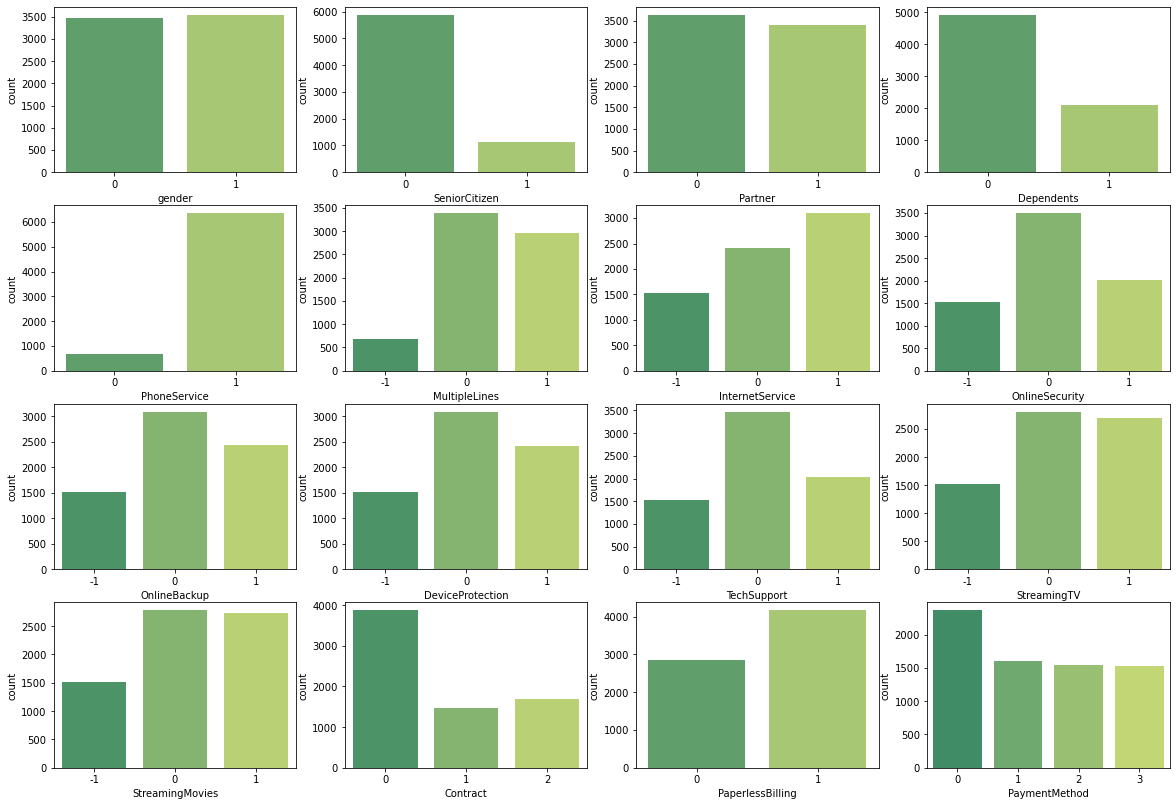

In [26]:
# Plot countplot to get overview of all the categorical variables

plt.figure(figsize=(20,14))
i=1

for column_cat in data.columns:
    if (str(data[column_cat].dtype) == 'category'):
        plt.subplot(4, 4, i)
        sns.countplot(x = column_cat, data = data, palette = 'summer');
        i += 1
        if i > 16:
            break

**gender, Partner, and MultipleLines:**
    Almost equal distribution of data for these attributes

**SeniorCitizen, Dependents and PhoneService:** 
    There is a significant difference between data for these variables.

**InternetService:**
    Not equally distributed. There are customers who do not have any internet service.

**OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies:**
    These attributes depend on internet service. So customers who do not have internet service we dont have data for it. 
    
   From these StreamingTV and StreamingMovies have equal distribution in yes and no. For other attributes count of no is greater than count of yes.

**Contract:** 
    Monthly contracts are significantly greater than the other two.

**PaperlessBilling:** 
    Most of the customers has PaperlessBilling.

**PaymentMethod:**
    Electronic check is greater than the other payment methods

### Bivariate Analysis

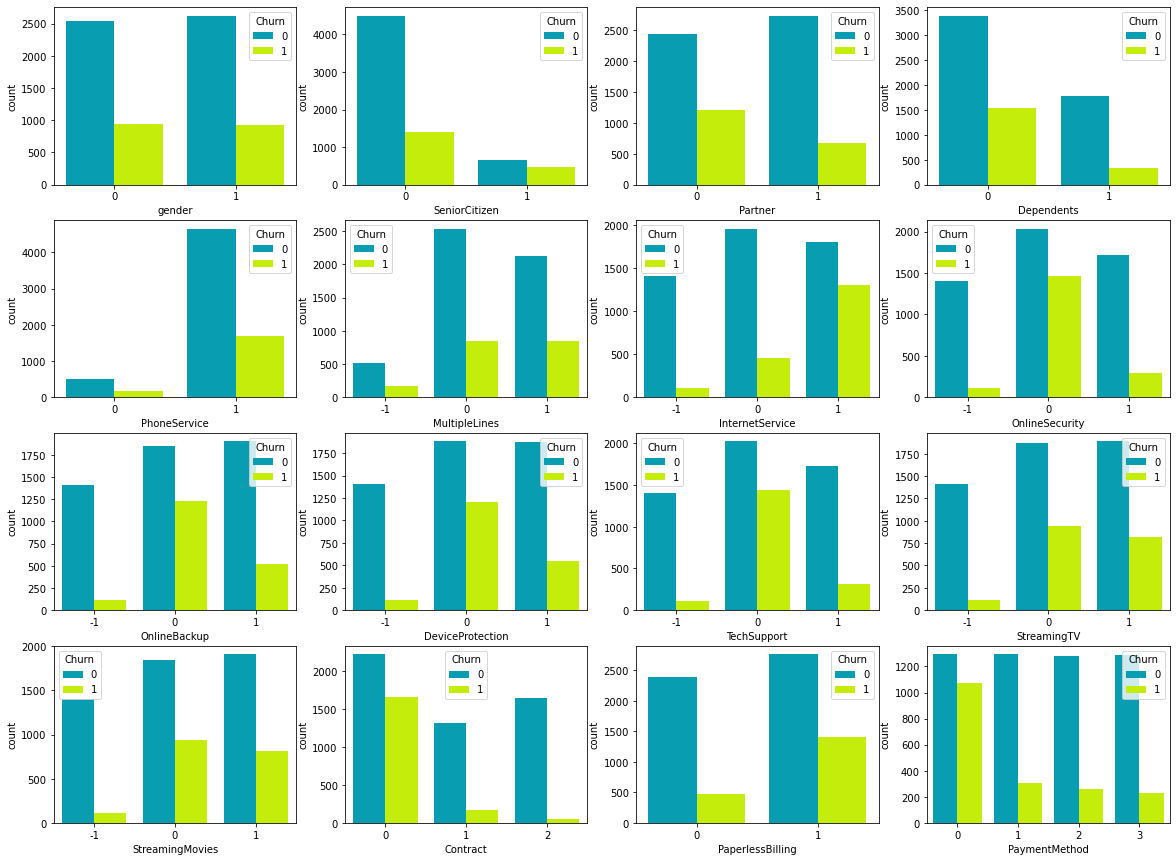

In [27]:
# Let us analyse the data using countplot.

plt.figure(figsize = (20,15))
i = 1

for column_cat in data.columns:
    if (str(data[column_cat].dtype) == 'category'):
        plt.subplot(4, 4, i)
        sns.countplot(x = column_cat, data = data, hue = 'Churn', palette = 'nipy_spectral', saturation = 0.9);
        i += 1
        if i > 16:
            break

**Maximum churned customers are as below:**

Chruning of SeniorCitizen is more

InternetService having FiberOptic. We will analyse this in detail.

Customers with Month-to-month Contract

PaymentMethod with Electronic Check

It is important to have InternetService with OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport services.

**Less churning of customers are as below:**

Customers with No Internet Service

Helding One year or Two year contract

Customers who are dependents

with OnlineSecurity, TechSupport

with No PaperlessBilling

**We can use these pointers to make our strategy to control churning of customers**

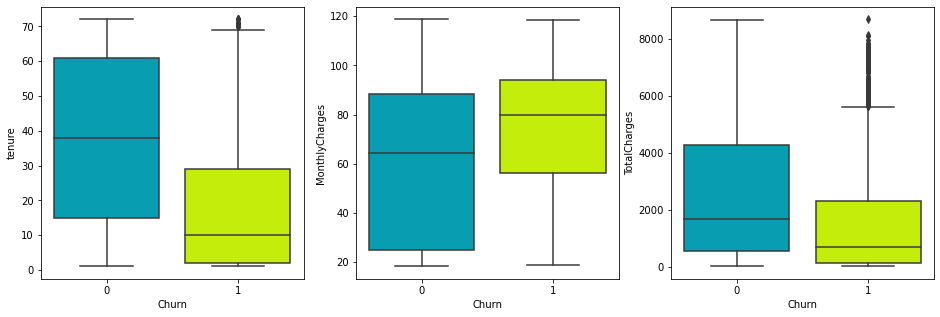

In [28]:
plt.figure(figsize = (16,5))

plt.subplot(1, 3, 1)
sns.boxplot(data = data, y= 'tenure', x = 'Churn', palette = 'nipy_spectral', saturation = 0.9);

plt.subplot(1, 3, 2)
sns.boxplot(data = data, y = 'MonthlyCharges', x = 'Churn', palette = 'nipy_spectral', saturation = 0.9);

plt.subplot(1, 3, 3)
sns.boxplot(data = data, y = 'TotalCharges', x = 'Churn', palette = 'nipy_spectral', saturation = 0.9);

tenure: Most of the Churned customers are having less tenure. There are few outliers as well with tenure more than 65. We will check this in detail.

MonthlyCharges: Most of the Churned customers have more MonthlyCharges. 50% of customers who churned are with MonthlyCharges above 80.

TotalCharges: Less the TotalCharges, more the churning of the customers. It also has outliers above 6000.

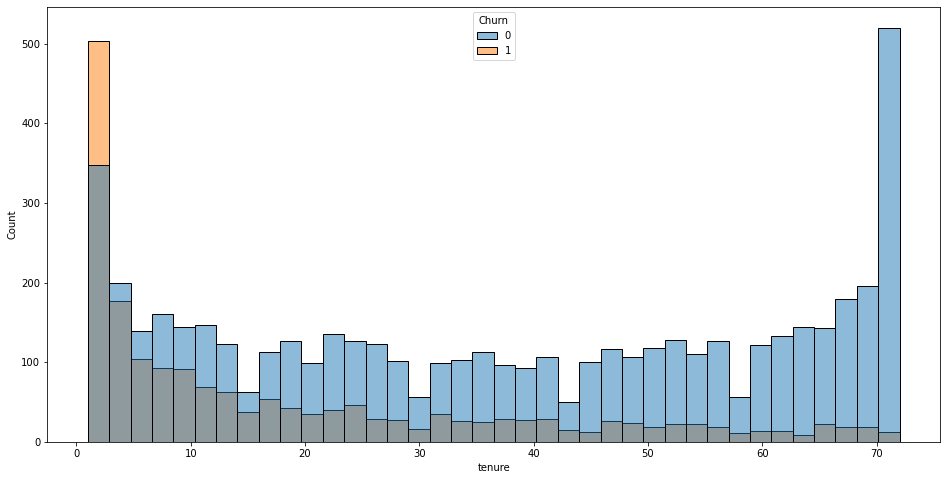

In [29]:
# Want to understand if tenure has any relation with churn customers

plt.figure(figsize = (16,8))
sns.histplot(data = data, x = 'tenure', hue = 'Churn', bins = 38);

Customers with tenure less than 2 is more churned than non-churned. Churning reduces with the tenure.

From statistics we see that 25% of the customers are below tenure of 10. and before tenure of 4, churned customers are more than non-churned. 

We need to focus on these customers and identify what are the cause of churning.

We will see it in multivariate analysis.

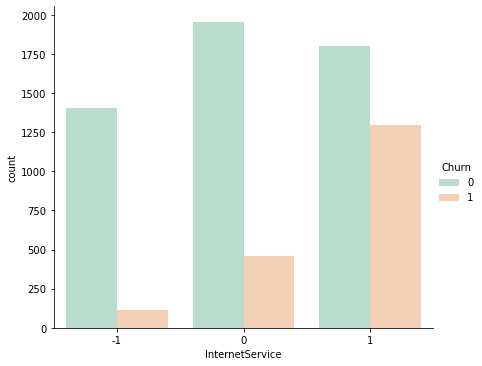

In [30]:
# Let us check anlysis of InternetService

sns.catplot(x = 'InternetService', data = data, hue = 'Churn', kind = 'count', palette = 'Pastel2', aspect = 1.2);

Most of the cusomers churned with InternetService of Fiber optic.

Half of the customers using Fiber optic has churned and half are not. Its a big number so need to see if there is any problem with that InternetService. So that we can retain maximum customers.

In [31]:
# Let us evaluate more about customers having internet service as Fiber optic.

data_c = data.copy()
data_c = data_c[data_c['InternetService'] == 1] # 1 is for Fiber optic
data_c.shape

(3096, 20)

In [32]:
data_c.Churn.value_counts()

0    1799
1    1297
Name: Churn, dtype: int64

Almost half of the customers has internet service as Fiber optic. Almost 20% of the total data are churned who uses Fiber optic.

Let us check if there is any particular reason for churning of customers with Fiber optic.

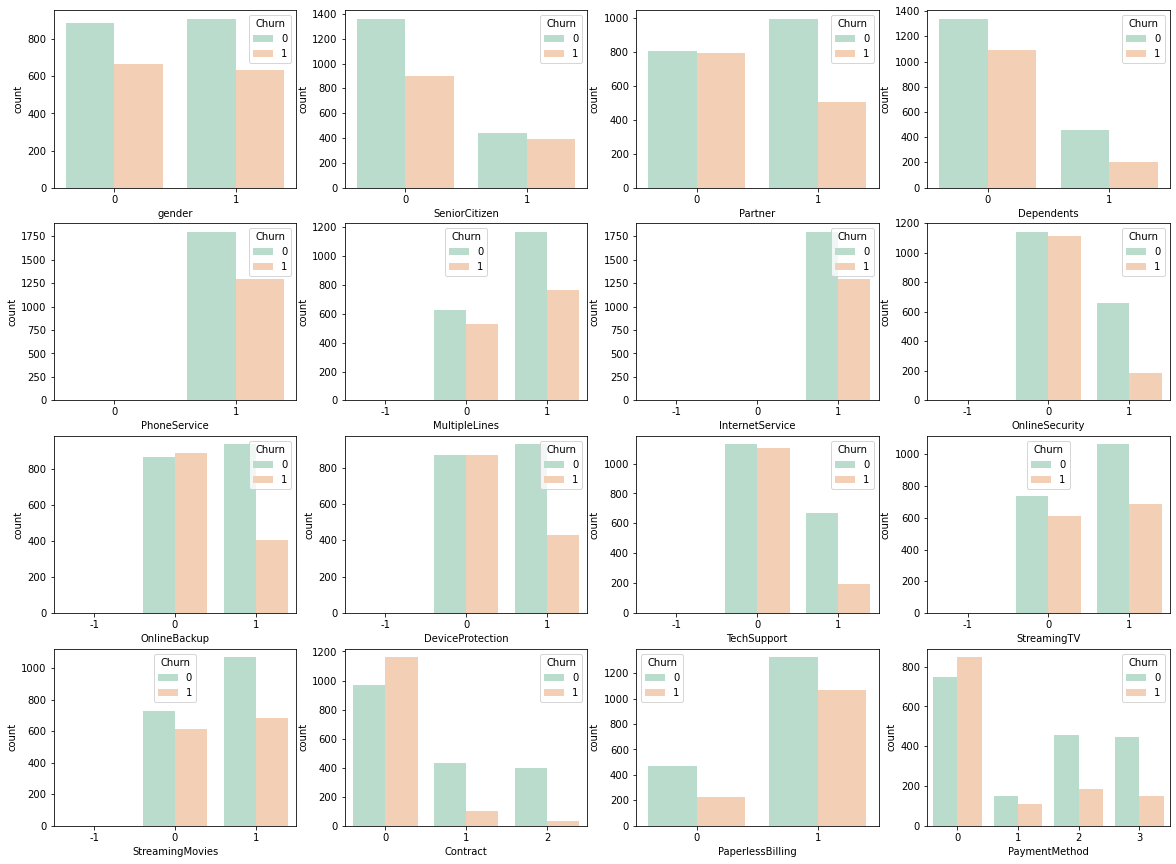

In [33]:
plt.figure(figsize = (20,15))
i=1

for column_cat in data_c.columns:
    if (str(data_c[column_cat].dtype) == 'category'):
        plt.subplot(4, 4, i)
        sns.countplot(x = column_cat, data = data_c, hue = 'Churn', palette = 'Pastel2');
        i += 1
        if i > 16:
            break

This analysis is for customers who are opted for InternetService of Fiber optic:

Partner are churned less than No Partner.

Customers who are not opted for OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport services are more prone to churning than who have these services.

PaymentMethod of Electronic chek are churned more than the other methods.

We can focus on these points to reduce churning.

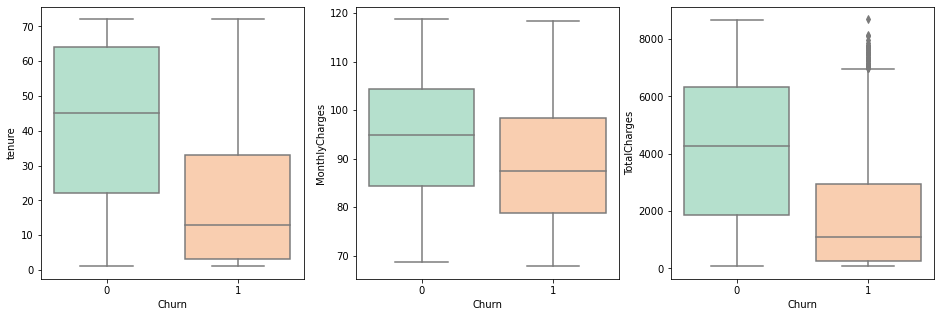

In [34]:
plt.figure(figsize=(16,5))

plt.subplot(1, 3, 1)
sns.boxplot(data = data_c, y = 'tenure', x = 'Churn', palette = 'Pastel2', saturation = 0.9);

plt.subplot(1, 3, 2)
sns.boxplot(data = data_c, y = 'MonthlyCharges', x = 'Churn', palette = 'Pastel2', saturation = 0.9);

plt.subplot(1, 3, 3)
sns.boxplot(data = data_c, y = 'TotalCharges', x = 'Churn', palette = 'Pastel2', saturation = 0.9);

Tenure: Churning is more for less tenure and it is less for tenure.

MonthlyCharges: MonthlyCharges is not the reason for churning of customers. We can relate this to customers who opted for more services for them MonthlyCharges are more and churning is less.

**This was about customers who are using InternetService as Fiber optic.**

### Multivariate Analysis

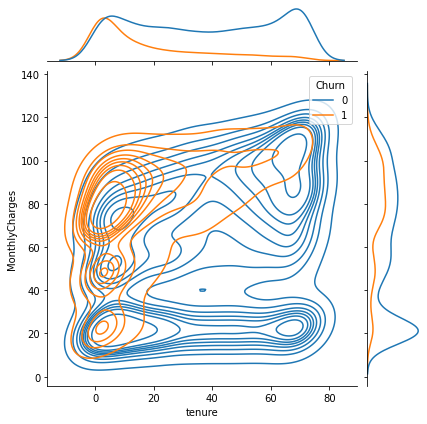

In [35]:
sns.jointplot(data = data, x = 'tenure', y = 'MonthlyCharges', hue = 'Churn', kind = 'kde');

Customers with less tenure but high MonthlyCharges are churned more.

Also customers with less tenure and less MonthlyCharges are churned less.

Less MonthlyCharges customers are tend to be not churned. As tenure increases there are less chances of customer getting churned.

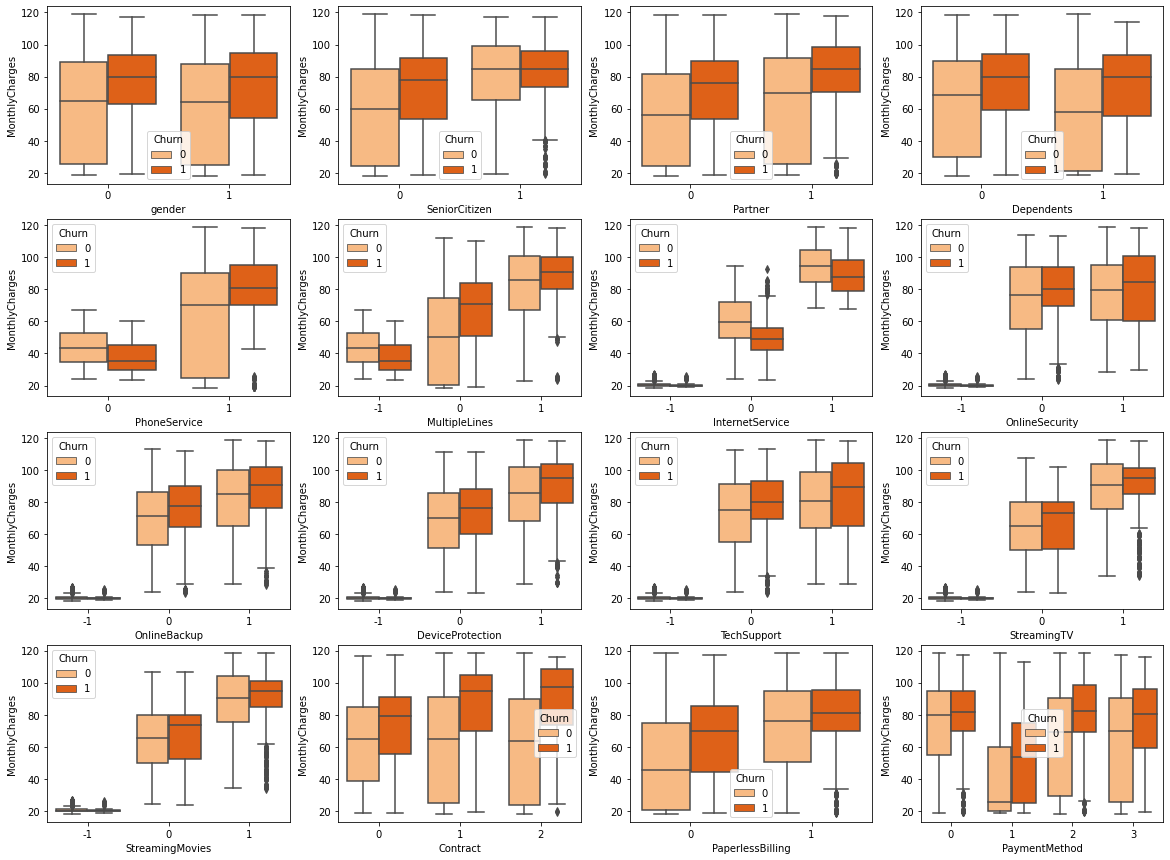

In [36]:
# Let us explore more about MonthlyCharges.

plt.figure(figsize = (20,15))
i=1

for column_cat in data.columns:
    if (str(data[column_cat].dtype) == 'category'):
        plt.subplot(4, 4, i)
        sns.boxplot(x = column_cat, y = 'MonthlyCharges', data = data, hue = 'Churn', 
                    palette = 'Oranges', saturation = 0.9);
        i += 1
        if i > 16:
            break

For InternetService and No PhoneService MonthlyCharges are inversely proportional to Churn.

It seems MonthlyCharges does not affect SeniorCitizen.

For all the other variables more the MonthlyCharges the churning is more.

**From this Data analysis & visualisation we came to know few pointers which we will be able to use to retain the customers.**

### 4. Data pre-processing: 
[ Score: 5 point ]

• Segregate predictors vs target attributes

• Check for target balancing and fix it if found imbalanced.

• Perform train-test split.

• Check if the train and test data have similar statistical characteristics when compared with original data

In [37]:
# Target is Churn column. Separate it.

data1 = data.copy()

y = data1.pop('Churn')
X = data1

In [38]:
y.value_counts().to_frame()

,Churn
0,5163
1,1869


Target data is imbalanced. So we will fix it after splitting of the data.

In [39]:
# Split data into 70-30.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 55)

In [40]:
# Let us use SMOTE to balance target data and regularize it.

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC

print(f'Before SMOTE, count of label 1 :{sum(y_train == 1)}')
print(f'Before SMOTE, count of label 0 :{sum(y_train == 0)}\n')

sm = SMOTENC (categorical_features= [0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16], random_state= 15)

# Using SMOTE on train data
X_trainR, y_trainR = sm.fit_sample(X_train, y_train)

print(f'After SMOTE, count of label 1 :{sum(y_trainR == 1)}')
print(f'After SMOTE, count of label 0 :{sum(y_trainR == 0)}')


Before SMOTE, count of label 1 :1334
Before SMOTE, count of label 0 :3588

After SMOTE, count of label 1 :3588
After SMOTE, count of label 0 :3588


In [41]:
# Checking continuous variable split statistical characteristics.
# Comparing original data with X_trainR and X_test which we are going to use.
# There is going to be difference in split between train data and original data as we have balanced the data after split.

data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [42]:
X_trainR.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7176.0,27.280379,23.940373,1.00,5.000000,20.000000,48.000000,72.00
MonthlyCharges,7176.0,67.795628,28.535191,18.25,45.784574,74.886029,90.450000,118.75
TotalCharges,7176.0,2014.697902,2170.778980,18.90,259.700000,1130.850000,3222.427514,8672.45


In [43]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,2110.0,33.089573,24.665809,1.00,10.000,30.000,57.0000,72.0
MonthlyCharges,2110.0,65.011611,30.382678,18.55,35.500,70.275,90.2375,118.2
TotalCharges,2110.0,2319.620213,2280.788627,18.80,413.675,1434.200,3776.0000,8684.8


The split does not have much difference in tenure and MonthlyCharges. 

But there is some difference for TotalCharges in X_trainR data. Mean and 25, 50, 75 quartile are significantly different.

In [44]:
# Finding out split of True values, we can figure out flase values also from it.

col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for i in col:
    print('Original', i, 'True Values : {0:0.2f}%'.format((len(data.loc[data[i] == 1])/len(data.index))*100))
    print('Train', i, 'True Values    : {0:0.2f}%'.format((len(X_trainR.loc[X_trainR[i] == 1])/len(X_trainR.index))*100))
    print('Test', i, 'True Values     : {0:0.2f}%\n'.format((len(X_test.loc[X_test[i] == 1])/len(X_test.index))*100))

Original gender True Values : 50.47%
Train gender True Values    : 50.20%
Test gender True Values     : 50.38%

Original SeniorCitizen True Values : 16.24%
Train SeniorCitizen True Values    : 16.03%
Test SeniorCitizen True Values     : 16.68%

Original Partner True Values : 48.25%
Train Partner True Values    : 41.22%
Test Partner True Values     : 49.19%

Original Dependents True Values : 29.85%
Train Dependents True Values    : 21.86%
Test Dependents True Values     : 30.24%

Original PhoneService True Values : 90.33%
Train PhoneService True Values    : 91.74%
Test PhoneService True Values     : 90.33%

Original PaperlessBilling True Values : 59.27%
Train PaperlessBilling True Values    : 66.79%
Test PaperlessBilling True Values     : 60.47%



Distribution of test is matching original data but there is some difference for train data. There is a diffrence for Partner, Dependents, PaperlessBilling variables.

In [45]:
col1 = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in col1:
    print('Original', i, 'True Values  : {0:0.2f}%'.format((len(data.loc[data[i] == 1])/len(data.index))*100))
    print('Train', i, 'True Values     : {0:0.2f}%'.format((len(X_trainR.loc[X_trainR[i] == 1])/len(X_trainR.index))*100))
    print('Test', i, 'True Values      : {0:0.2f}%\n'.format((len(X_test.loc[X_test[i] == 1])/len(X_test.index))*100))
    
    print('Original', i, 'False Values  : {0:0.2f}%'.format((len(data.loc[data[i] == 0])/len(data.index))*100))
    print('Train', i, 'False Values     : {0:0.2f}%'.format((len(X_trainR.loc[X_trainR[i] == 0])/len(X_trainR.index))*100))
    print('Test', i, 'False Values      : {0:0.2f}%\n'.format((len(X_test.loc[X_test[i] == 0])/len(X_test.index))*100))

Original MultipleLines True Values  : 42.19%
Train MultipleLines True Values     : 44.84%
Test MultipleLines True Values      : 43.46%

Original MultipleLines False Values  : 48.14%
Train MultipleLines False Values     : 46.75%
Test MultipleLines False Values      : 46.87%

Original OnlineSecurity True Values  : 28.65%
Train OnlineSecurity True Values     : 21.07%
Test OnlineSecurity True Values      : 29.76%

Original OnlineSecurity False Values  : 49.73%
Train OnlineSecurity False Values     : 62.19%
Test OnlineSecurity False Values      : 48.34%

Original OnlineBackup True Values  : 34.49%
Train OnlineBackup True Values     : 28.82%
Test OnlineBackup True Values      : 35.07%

Original OnlineBackup False Values  : 43.90%
Train OnlineBackup False Values     : 54.45%
Test OnlineBackup False Values      : 43.03%

Original DeviceProtection True Values  : 34.39%
Train DeviceProtection True Values     : 28.87%
Test DeviceProtection True Values      : 34.17%

Original DeviceProtection Fals

Not considered No service Distribution as we are checking values for both True and False.

Distribution of test is matching original data but there is some difference for train data. There is a diffrence for OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport.

In [46]:
print('Original InternetService DSL Values  : {0:0.2f}%'.format((len(data.loc[data['InternetService'] == 0])/len(data.index))*100))
print('Train InternetService DSL Values     : {0:0.2f}%'.format((len(X_trainR.loc[X_trainR['InternetService'] == 0])/len(X_trainR.index))*100))
print('Test InternetService DSL Values      : {0:0.2f}%\n'.format((len(X_test.loc[X_test['InternetService'] == 0])/len(X_test.index))*100))

print('Original InternetService Fiber optic Values  : {0:0.2f}%'.format((len(data.loc[data['InternetService'] == 1])/len(data.index))*100))
print('Train InternetService Fiber optic Values     : {0:0.2f}%'.format((len(X_trainR.loc[X_trainR['InternetService'] == 1])/len(X_trainR.index))*100))
print('Test InternetService Fiber optic Values      : {0:0.2f}%\n'.format((len(X_test.loc[X_test['InternetService'] == 1])/len(X_test.index))*100))

Original InternetService DSL Values  : 34.36%
Train InternetService DSL Values     : 29.39%
Test InternetService DSL Values      : 33.98%

Original InternetService Fiber optic Values  : 44.03%
Train InternetService Fiber optic Values     : 53.87%
Test InternetService Fiber optic Values      : 44.12%



Distribution of test is matching original data but there is some difference for train data.

In [47]:
print('Original Contract Month-to-month Values  : {0:0.2f}%'.format((len(data.loc[data['Contract'] == 0])/len(data.index))*100))
print('Train Contract Month-to-month Values     : {0:0.2f}%'.format((len(X_trainR.loc[X_trainR['Contract'] == 0])/len(X_trainR.index))*100))
print('Test Contract Month-to-month Values      : {0:0.2f}%\n'.format((len(X_test.loc[X_test['Contract'] == 0])/len(X_test.index))*100))

print('Original Contract One year Values  : {0:0.2f}%'.format((len(data.loc[data['Contract'] == 1])/len(data.index))*100))
print('Train Contract One year Values     : {0:0.2f}%'.format((len(X_trainR.loc[X_trainR['Contract'] == 1])/len(X_trainR.index))*100))
print('Test Contract One year Values      : {0:0.2f}%\n'.format((len(X_test.loc[X_test['Contract'] == 1])/len(X_test.index))*100))

print('Original Contract Two year Values  : {0:0.2f}%'.format((len(data.loc[data['Contract'] == 2])/len(data.index))*100))
print('Train Contract Two year Values     : {0:0.2f}%'.format((len(X_trainR.loc[X_trainR['Contract'] == 2])/len(X_trainR.index))*100))
print('Test Contract Two year Values      : {0:0.2f}%\n'.format((len(X_test.loc[X_test['Contract'] == 2])/len(X_test.index))*100))


Original Contract Month-to-month Values  : 55.11%
Train Contract Month-to-month Values     : 67.31%
Test Contract Month-to-month Values      : 55.02%

Original Contract One year Values  : 20.93%
Train Contract One year Values     : 15.80%
Test Contract One year Values      : 20.76%

Original Contract Two year Values  : 23.96%
Train Contract Two year Values     : 16.89%
Test Contract Two year Values      : 24.22%



Distribution of test is matching original data but there is some difference for train data.

In [48]:
print('Original PaymentMethod Electronic check Values  : {0:0.2f}%'.format((len(data.loc[data['PaymentMethod'] == 0])/len(data.index))*100))
print('Train PaymentMethod Electronic check Values     : {0:0.2f}%'.format((len(X_trainR.loc[X_trainR['PaymentMethod'] == 0])/len(X_trainR.index))*100))
print('Test PaymentMethod Electronic check Values      : {0:0.2f}%\n'.format((len(X_test.loc[X_test['PaymentMethod'] == 0])/len(X_test.index))*100))

print('Original PaymentMethod Mailed check Values  : {0:0.2f}%'.format((len(data.loc[data['PaymentMethod'] == 1])/len(data.index))*100))
print('Train PaymentMethod Mailed check Values     : {0:0.2f}%'.format((len(X_trainR.loc[X_trainR['PaymentMethod'] == 1])/len(X_trainR.index))*100))
print('Test PaymentMethod Mailed check Values      : {0:0.2f}%\n'.format((len(X_test.loc[X_test['PaymentMethod'] == 1])/len(X_test.index))*100))

print('Original PaymentMethod Bank transfer (automatic) Values  : {0:0.2f}%'.format((len(data.loc[data['PaymentMethod'] == 2])/len(data.index))*100))
print('Train PaymentMethod Bank transfer (automatic) Values     : {0:0.2f}%'.format((len(X_trainR.loc[X_trainR['PaymentMethod'] == 2])/len(X_trainR.index))*100))
print('Test PaymentMethod Bank transfer (automatic) Values      : {0:0.2f}%\n'.format((len(X_test.loc[X_test['PaymentMethod'] == 2])/len(X_test.index))*100))

print('Original PaymentMethod Credit card (automatic) Values  : {0:0.2f}%'.format((len(data.loc[data['PaymentMethod'] == 3])/len(data.index))*100))
print('Train PaymentMethod Credit card (automatic) Values     : {0:0.2f}%'.format((len(X_trainR.loc[X_trainR['PaymentMethod'] == 3])/len(X_trainR.index))*100))
print('Test PaymentMethod Credit card (automatic) Values      : {0:0.2f}%\n'.format((len(X_test.loc[X_test['PaymentMethod'] == 3])/len(X_test.index))*100))


Original PaymentMethod Electronic check Values  : 33.63%
Train PaymentMethod Electronic check Values     : 47.70%
Test PaymentMethod Electronic check Values      : 33.36%

Original PaymentMethod Mailed check Values  : 22.81%
Train PaymentMethod Mailed check Values     : 20.11%
Test PaymentMethod Mailed check Values      : 20.90%

Original PaymentMethod Bank transfer (automatic) Values  : 21.93%
Train PaymentMethod Bank transfer (automatic) Values     : 16.69%
Test PaymentMethod Bank transfer (automatic) Values      : 22.51%

Original PaymentMethod Credit card (automatic) Values  : 21.63%
Train PaymentMethod Credit card (automatic) Values     : 15.50%
Test PaymentMethod Credit card (automatic) Values      : 23.22%



Distribution of test is matching original data but there is some difference for train data.

In [49]:
print('Original Churn True Values  : {0:0.2f}%'.format((len(data.loc[data['Churn'] == 1])/len(data.index))*100))
print('Train Churn True Values     : {0:0.2f}%'.format(((sum(y_trainR == 1))/len(y_trainR.index))*100))
print('Test Churn True Values      : {0:0.2f}%\n'.format(((sum(y_test == 1))/len(y_test.index))*100))

print('Original Churn False Values  : {0:0.2f}%'.format((len(data.loc[data['Churn'] == 0])/len(data.index))*100))
print('Train Churn False Values     : {0:0.2f}%'.format(((sum(y_trainR == 0))/len(y_trainR.index))*100))
print('Test Churn False Values      : {0:0.2f}%\n'.format(((sum(y_test == 0))/len(y_test.index))*100))


Original Churn True Values  : 26.58%
Train Churn True Values     : 50.00%
Test Churn True Values      : 25.36%

Original Churn False Values  : 73.42%
Train Churn False Values     : 50.00%
Test Churn False Values      : 74.64%



We can see our target training data is equally distributed because of balancing.

### 5. Model training, testing and tuning: 
[ Score: 25 point ]

• Train and test all ensemble models taught in the learning module.

• Suggestion: Use standard ensembles available. Also you can design your own ensemble technique using weak classifiers.

• Display the classification accuracies for train and test data.

• Apply all the possible tuning techniques to train the best model for the given data.

• Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.

• Display and compare all the models designed with their train and test accuracies.

• Select the final best trained model along with your detailed comments for selecting this model.

• Pick the selected model for future use

In [50]:
# Let us use Ensemble Models one by one. 
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

DTree = DecisionTreeClassifier (criterion = 'entropy', random_state = 22)
DTree.fit(X_trainR, y_trainR)
DTreeTr = DTree.score(X_trainR, y_trainR).round(3)
DTreeTe = DTree.score(X_test, y_test).round(3)

print('Train Accuracy:', DTreeTr)
print('Test Accuracy:', DTreeTe)

Train Accuracy: 0.998
Test Accuracy: 0.734


Train accuracy is almost around 1 due to overfitting. 

There is a significant difference between test and train accuracy. So we will regularise model by prunning.

In [51]:
acc_report = pd.DataFrame({'Model': ['Decision Tree'], 'Accuracy Test': [DTreeTe], 'Accuracy Train': [DTreeTr]})
acc_report.set_index('Model', inplace= True)
acc_report

,Accuracy Test,Accuracy Train
Model,,
Decision Tree,0.734,0.998


In [52]:
# Regularize the Decision Tree

DTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state = 5)
DTreeR.fit(X_trainR, y_trainR)
pred_dtR = DTreeR.predict(X_test)
DT_accTr = DTreeR.score(X_trainR, y_trainR).round(3)
DT_accTe = DTreeR.score(X_test, y_test).round(3)
print('Train Accuracy:', DT_accTr)
print('Test Accuracy:', DT_accTe)

Train Accuracy: 0.802
Test Accuracy: 0.774


After pruning, accuracy of training data has reduced but accuracy of tesing and training data are closer.

Also the accuracy of Testing data is improved.

In [53]:
acc_report.loc['Decision Tree R'] = [DT_accTe, DT_accTr]
acc_report

,Accuracy Test,Accuracy Train
Model,,
Decision Tree,0.734,0.998
Decision Tree R,0.774,0.802


In [54]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_trainR, y_trainR)
pred_rf = rfcl.predict(X_test)
rfcl_accTe = accuracy_score(y_test, pred_rf).round(3)
rfcl_accTr = rfcl.score(X_trainR, y_trainR).round(3)

acc_report.loc['Random Forest'] = [rfcl_accTe, rfcl_accTr]
acc_report

,Accuracy Test,Accuracy Train
Model,,
Decision Tree,0.734,0.998
Decision Tree R,0.774,0.802
Random Forest,0.779,0.998


Train accuracy is almost around 1 due to overfitting. 

There is a significant difference between test and train accuracy. So we will regularise model by prunning.

In [55]:
rfclR = RandomForestClassifier(n_estimators = 50, max_depth = 7)
rfclR = rfclR.fit(X_trainR, y_trainR)
pred_rfR = rfclR.predict(X_test)
rfclR_accTe = accuracy_score(y_test, pred_rfR).round(3)
rfclR_accTr = rfclR.score(X_trainR, y_trainR).round(3)

acc_report.loc['Random Forest R'] = [rfclR_accTe, rfclR_accTr]
acc_report

,Accuracy Test,Accuracy Train
Model,,
Decision Tree,0.734,0.998
Decision Tree R,0.774,0.802
Random Forest,0.779,0.998
Random Forest R,0.777,0.842


After pruning, accuracy of training data has reduced but accuracy of tesing and training data are closer.

In [56]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators = 50, max_samples = .8, bootstrap = True, random_state = 10)
bgcl = bgcl.fit(X_trainR, y_trainR)
pred_bg = bgcl.predict(X_test)
bg_accTe = accuracy_score(y_test, pred_bg).round(3)
bg_accTr = bgcl.score(X_trainR, y_trainR).round(3)

acc_report.loc['Bagging Classifier'] = [bg_accTe, bg_accTr]
acc_report

,Accuracy Test,Accuracy Train
Model,,
Decision Tree,0.734,0.998
Decision Tree R,0.774,0.802
Random Forest,0.779,0.998
Random Forest R,0.777,0.842
Bagging Classifier,0.776,0.995


Train accuracy is almost around 1 due to overfitting. 

There is a significant difference between test and train accuracy. So we will regularise model by prunning.

In [57]:
bgclR = BaggingClassifier(n_estimators = 100, max_samples = .8, bootstrap = True, oob_score = True, random_state = 10,
                         max_features = 2)
bgclR = bgclR.fit(X_trainR, y_trainR)
pred_bgR = bgclR.predict(X_test)
bg_accTeR = accuracy_score(y_test, pred_bgR).round(3)
bg_accTrR = bgclR.score(X_trainR, y_trainR).round(3)

acc_report.loc['Bagging Classifier R'] = [bg_accTeR, bg_accTrR]
acc_report

,Accuracy Test,Accuracy Train
Model,,
Decision Tree,0.734,0.998
Decision Tree R,0.774,0.802
Random Forest,0.779,0.998
Random Forest R,0.777,0.842
Bagging Classifier,0.776,0.995
Bagging Classifier R,0.744,0.865


After pruning, accuracy of training data has reduced but accuracy of tesing and training data are closer.

In [58]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 50, random_state = 22)
abcl = abcl.fit(X_trainR, y_trainR)
pred_abcl = abcl.predict(X_test)
abcl_accTe = accuracy_score(y_test, pred_abcl).round(3)
abcl_accTr = abcl.score(X_train, y_train).round(3)

acc_report.loc['Ada Boost'] = [abcl_accTe, abcl_accTr]
acc_report

,Accuracy Test,Accuracy Train
Model,,
Decision Tree,0.734,0.998
Decision Tree R,0.774,0.802
Random Forest,0.779,0.998
Random Forest R,0.777,0.842
Bagging Classifier,0.776,0.995
Bagging Classifier R,0.744,0.865
Ada Boost,0.764,0.771


There is not much difference of accuracies between Test and Train data. And it is not overfitted.

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state = 30)
gbcl = gbcl.fit(X_trainR, y_trainR)
pred_gb = gbcl.predict(X_test)
gb_accTe = accuracy_score(y_test, pred_gb).round(3)
gb_accTr = gbcl.score(X_trainR, y_trainR).round(3)

acc_report.loc['Gradient Boosting'] = [gb_accTe, gb_accTr]
acc_report

,Accuracy Test,Accuracy Train
Model,,
Decision Tree,0.734,0.998
Decision Tree R,0.774,0.802
Random Forest,0.779,0.998
Random Forest R,0.777,0.842
Bagging Classifier,0.776,0.995
Bagging Classifier R,0.744,0.865
Ada Boost,0.764,0.771
Gradient Boosting,0.776,0.827


There is not much difference of accuracies between Test and Train data. And it is not overfitted.

**We can use Decision Tree R, Random Forest R, Ada Boost, Gradient Boosting models as all have around 77% accuracies.**

**Ada Boost is better model because there is not much difference between test and train data.**

**But if we dont want to use boosting model then we can go for Decision Tree R.**

Now let us check confusion matrix.

**Customers who are Churned but we have predicted as Non-Churned. We want this error to be less.**

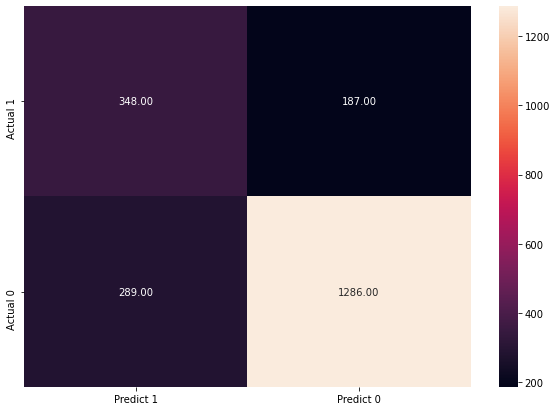

In [60]:
# Confusion matrix for Decision Tree R

from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix (y_test, pred_dtR, labels = [1, 0])
df_cm = pd.DataFrame (cm, index = ['Actual 1', 'Actual 0'], columns = ['Predict 1', 'Predict 0'])
plt.figure(figsize= (10,7))
sns.heatmap(df_cm, annot=True, fmt='.2f');

In [61]:
data_cm = pd.DataFrame({'Model': ['Decision Tree R'], 'Count': [df_cm.iloc[0,1]]})
# data_cm.set_index('Model', inplace = True)
data_cm

,Model,Count
0,Decision Tree R,187


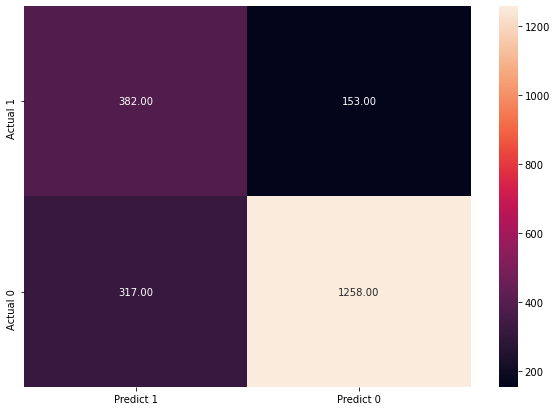

In [62]:
# Confusion matrix for Rain Forest R

from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix (y_test, pred_rfR, labels = [1, 0])
df_cm = pd.DataFrame (cm, index = ['Actual 1', 'Actual 0'], columns = ['Predict 1', 'Predict 0'])
plt.figure(figsize= (10,7))
sns.heatmap(df_cm, annot=True, fmt='.2f');

In [63]:
data_cm.loc['1'] = ['Random Forest R', df_cm.iloc[0,1]]
data_cm


,Model,Count
0,Decision Tree R,187
1,Random Forest R,153


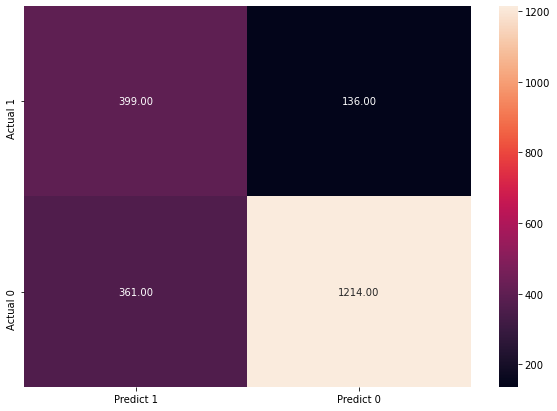

In [64]:
# Confusion matrix for Ada Boost

from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix (y_test, pred_abcl, labels = [1, 0])
df_cm = pd.DataFrame (cm, index = ['Actual 1', 'Actual 0'], columns = ['Predict 1', 'Predict 0'])
plt.figure(figsize= (10,7))
sns.heatmap(df_cm, annot=True, fmt='.2f');

In [65]:
data_cm.loc['2'] = ['Ada Boost', df_cm.iloc[0,1]]
data_cm

,Model,Count
0,Decision Tree R,187
1,Random Forest R,153
2,Ada Boost,136


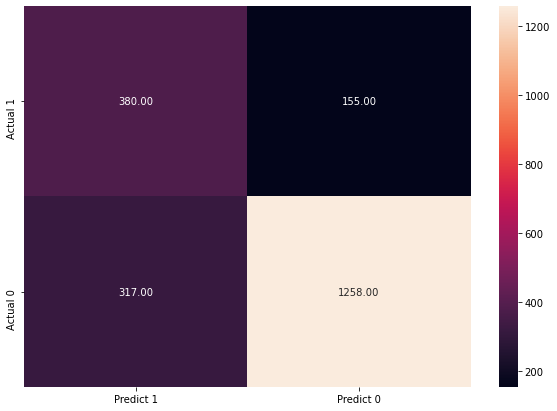

In [66]:
# Confusion matrix for Gradient Boost

from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix (y_test, pred_gb, labels = [1, 0])
df_cm = pd.DataFrame (cm, index = ['Actual 1', 'Actual 0'], columns = ['Predict 1', 'Predict 0'])
plt.figure(figsize= (10,7))
sns.heatmap(df_cm, annot=True, fmt='.2f');

In [67]:
data_cm.loc['3'] = ['Gradient Boosting', df_cm.iloc[0,1]]
data_cm

,Model,Count
0,Decision Tree R,187
1,Random Forest R,153
2,Ada Boost,136
3,Gradient Boosting,155


In above table the count is for customers who are Churned but from model it is marked as Non-Churned. 

Less the error better the model.

**We can finalise Ada Boost Model as it has less number of these errors.**

### 6. Conclusion and improvisation: 
[ Score: 5 point ]

• Write your conclusion on the results.

• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the telecom operator to perform a better data analysis in future

**Answer:**

We can use Decision Tree R, Random Forest R, Ada Boost, Gradient Boosting models to predict customer probability to churn. We can prefer Ada Boost model as it has less number of errors.

From Data analysis & visualisation:
Need to focus on customers who have less than 4 tenure, with internet service of fiber optic. Also focus on customers to sign up for other services which has less churning. Churning is more for More monthly charges.

We can use this analysis to make a strategy to retain more number of customers. 

Suggestions:

Most of the customers are churned having more MonthlyCharges. We have only last month's data so we need to check if recently any other telecom is providing services with lower MonthlyCharges. Or if we would have got old data as well then we could have analyse the situation better.

We have very less data for Churned customers than non-churned. If we can receive balanced data it would be great. 

Ovrall more data would have been good to find more patterns and to improve accuracy.